In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/wbc-data/WBC_data.csv


In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
X = [1, 2, 3]
weights = [0.01, 0.4, 0.53]
bias = 0.5

z = X[0] * weights[0] + X[1] * weights[1] + X[2] * weights[2] + bias

print(f"z = {z}")

z = 2.9000000000000004


In [4]:
list1 = [1, 2, 3, 4]

numpy_list1 = np.array(list1)

print(numpy_list1.shape)

list2 = [
    [1, 2, 3, 4], [5, 6, 7, 8]
]
numpy_list2 = np.array(list2)
print(numpy_list2.shape)

list3 = [
    [1, 2, 3, 4], [5, 6, 7, 8], [10, 1, 37, 0]
]
numpy_list3 = np.array(list3)
print(numpy_list3.shape)

list4 = [
    [1, 2, 3, 4], [5, 6, 7, 8], [10, 1, 37, 0], [32, 11, 45, 98]
]
numpy_list4 = np.array(list4)
print(numpy_list4.shape)

list5 = [[
    [1, 2, 3, 4], [5, 6, 7, 8]
],
[[10, 1, 37, 0], [32, 11, 45, 98]]
]
numpy_list5 = np.array(list5)
print(numpy_list5.shape)

print('')

(4,)
(2, 4)
(3, 4)
(4, 4)
(2, 2, 4)



In [5]:
X = [1,2,3]

weights = [[0.1,0.34,-0.5],
          [0.02,-0.9,-0.7]]

'''Convert them into numpy array to apply dot product. '''
X = np.array(X)
weights = np.array(weights)

weights_transpose = weights.T
out = np.dot(X, weights_transpose)

out

array([-0.72, -3.88])

In [6]:
def step_function(z):
    return np.maximum(0, z)

X = [1, 2, 3]

weights = [
    [0.1, 0.34, -0.5],
    [0.02, -0.9, -0.7]
]
biases = [2.3, 1.2]

weights = np.array(weights)
X = np.array(X)

z = np.dot(X, weights[0]) + biases[0]
a = step_function(z)
print(a)

z1 = np.dot(X, weights[1]) + biases[1]
a1 = step_function(z1)
print(a1)

1.5799999999999998
0.0


In [7]:
class DenseLayer:
    def __init__(self, inputs, neurons):
        self.weights = np.random.randn(inputs, neurons)
        self.biases = np.zeros((1, neurons))
        
    def forward_pass(self, X):
        self.output = np.dot(X, self.weights) + self.biases

In [8]:
X = [1, 2, 3]
X = np.array(X)

layer1 = DenseLayer(3, 2)

layer1.forward_pass(X)
print(f"LAYER 1 OUTPUT : {layer1.output}")
print(layer1.output.shape)

layer2 = DenseLayer(2, 1)
layer2.forward_pass(layer1.output)

print(f"LAYER 2 OUTPUT : {layer2.output}")

LAYER 1 OUTPUT : [[-3.58458721 -2.62641758]]
(1, 2)
LAYER 2 OUTPUT : [[-1.19675116]]


In [9]:
def cost_function(o, y):
    loss = np.dot(y, np.log(o)) + np.dot((1 - y), np.log(1 - o))
    return -loss

o = np.array([0.1, 0.95])
y = np.array([0, 1])
print(f"LOSS = {cost_function(o, y)}")

LOSS = 0.15665381004537687


In [10]:
class NN:
    def __init__(self, X, y, no_of_layers):
        self.X = X
        self.y = y
        self.samples = X.shape[0]
        self.no_of_layers = no_of_layers
        self.param = {}
        
    def weights_and_biases(self, layer_no, inputs, neurons):
        np.random.seed(1)
        self.param[f'weights_{layer_no}'] = np.random.randn(inputs, neurons)
        self.param[f'biases_{layer_no}'] = np.zeros((1, neurons))
        
    def Relu(self, z):
        return np.maximum(0, z)
    
    def Sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost_function(self, y, Yh):
        loss = (1./self.samples) * (-np.dot(y, np.log(Yh)) - np.dot(1 - y, np.log(1 - Yh)))
        return loss
    
    def appropriate_dim(self, z):
        if z.ndim == 1:
            return z.shape[0]
        else:
            return z.shape[1]
        
    def forward_pass(self, neurons):
        for layer_number in range(self.no_of_layers):
            if layer_number == 0:
                inputs = self.appropriate_dim(self.X)
                self.weights_and_biases(layer_number, inputs, neurons)
                z = np.dot(self.X, self.param[f'weights_{layer_number}']) + self.param[f'biases_{layer_number}']
                self.a = self.Relu(z)
            
            elif layer_number > 0 and layer_number != self.no_of_layers - 1:
                
                inputs = self.appropriate_dim(self.a)
                self.weights_and_biases(layer_number, inputs, neurons)
                z = np.dot(self.a, self.param[f'weights_{layer_number}']) + self.param[f'biases_{layer_number}']
                
            else:
                inputs = self.appropriate_dim(self.a)
                
                self.weights_and_biases(layer_number, inputs, 1)
                z = np.dot(self.a, self.param[f'weights_{layer_number}']) + self.param[f'biases_{layer_number}']
                self.a = self.Sigmoid(z)
                
            print(f"Layer NO {layer_number} : Output : {self.a}")
        print("COST = ", self.cost_function(self.y, self.a))
        
X = [
    [1, 2, 3], [4, 5, 6]
]
X = np.array(X)
y = np.array([0, 1])
model = NN(X, y, 3)
model.forward_pass(4)

Layer NO 0 : Output : [[ 4.31227791  0.          7.34777559  0.        ]
 [12.73865418  0.         15.38401943  0.        ]]
Layer NO 1 : Output : [[ 4.31227791  0.          7.34777559  0.        ]
 [12.73865418  0.         15.38401943  0.        ]]
Layer NO 2 : Output : [[0.95786149]
 [0.99999651]]
COST =  [1.58339835]


In [11]:
data = pd.read_csv('/kaggle/input/wbc-data/WBC_data.csv')
data.iloc[:,10].replace(2, 0,inplace=True)
data.iloc[:,10].replace(4, 1,inplace=True)

data = data[data.iloc[:,6].isin(['?']) == False]
data = data.astype(float)

names = data.columns[0:10]
scaler = MinMaxScaler() 
scaled_data = scaler.fit_transform(data.iloc[:,0:10]) 
scaled_data = pd.DataFrame(scaled_data, columns=names)

In [12]:
x = scaled_data.iloc[:650,:9].values
y = np.array(data.iloc[:650,10:].values)

x_val = scaled_data.iloc[651:,:9].values
y_val = np.array(data.iloc[651:,10:].values)

In [13]:
class NN:
    def __init__(self, X,y,no_of_layers,l_rate):
        self.X = X
        self.y = y
        self.no_of_layers = no_of_layers
        self.samples = X.shape[0]
        self.param = {}
        self.cache = {}
        self.loss = []
        self.lr = l_rate
        
        self.weights_and_biases(self.X.shape[1])
    
    def appropriate_dim(self,z):
        if z.ndim == 1:
            return z.shape[0]
        else:
            return z.shape[1]
        
    def weights_and_biases(self,neurons):
        inputs = self.X
        np.random.seed(1)
        
        for layer_no in range(self.no_of_layers):
            if layer_no == 0:
                
                inputs = self.appropriate_dim(self.X)

                
                self.param[f'weights_{layer_no}'] = np.empty([inputs,neurons],dtype=float)
                self.param[f'weights_{layer_no}'].fill(0.5)
                self.param[f'biases_{layer_no}'] = np.zeros((1,neurons))
                
            elif layer_no > 0 and layer_no != self.no_of_layers-1:
                
                self.param[f'weights_{layer_no}'] = np.empty([neurons,neurons],dtype=float)
                self.param[f'weights_{layer_no}'].fill(0.7)
                self.param[f'biases_{layer_no}'] = np.zeros((1,neurons))
            else:
              
                self.param[f'weights_{layer_no}'] = np.empty([neurons,1],dtype=float)
                self.param[f'weights_{layer_no}'].fill(0.7)
                self.param[f'biases_{layer_no}'] = np.zeros((1,1))
                
                
    def Relu(self,z):
        return np.maximum(0,z)
    
    def Sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def cost_function(self,y,yh):
        
        loss = (1./self.samples) * (-np.dot(y,np.log(yh)) - np.dot(1-y, np.log(1-yh)))    
        return loss
    
    def forward_pass(self,x):
        
        for layer_number in range(self.no_of_layers):
            
            if layer_number == 0:
                
                z = np.dot(x,self.param[f'weights_{layer_number}']) + self.param[f'biases_{layer_number}']
                self.a = self.Relu(z)
                self.cache[f'z_{layer_number}'] = z
                self.cache[f'a_{layer_number}'] = self.a
                
            else:
                
                z = np.dot(self.a,self.param[f'weights_{layer_number}']) + self.param[f'biases_{layer_number}']
                self.a = self.Sigmoid(z)
                self.cache[f'z_{layer_number}'] = z
                self.cache[f'a_{layer_number}'] = self.a 
                
        
        return self.a

    def dRelu(self,x):
        x[x<=0] = 0
        x[x>0] = 1
        return x
    
    def dSigmoid(self,Z):
        s = 1/(1+np.exp(-Z))
        dZ = s * (1-s)
        return dZ
    
    def backward_pass(self):
        
        total_loss = 0 
        
        for i in range(self.X.shape[0]):
            
            yh = self.forward_pass(self.X[i])
            loss = self.cost_function(self.y[i],yh)

            dLoss_Yh = 0
            dLoss_Yh = - (np.divide(self.y[i], yh ) - np.divide(1 - self.y[i], 1 - yh))    

            layer_number = self.no_of_layers-1

            while(layer_number>=0):

                if layer_number == self.no_of_layers-1:


                    dloss_z = dLoss_Yh * self.dSigmoid(self.cache[f'z_{layer_number}'])
                    dloss_a = np.dot(self.param[f'weights_{layer_number}'],dloss_z)
                    self.cache[f'w_loss_{layer_number}'] = 1./self.cache[f'a_{layer_number}'].shape[1] * np.dot(dloss_z,self.cache[f'a_{layer_number}'].T)
                    self.cache[f'b_loss_{layer_number}'] = 1./self.cache[f'a_{layer_number}'].shape[1] * np.dot(dloss_z,np.ones([dloss_z.shape[1],1]))

                elif layer_number > 0 and layer_number != self.no_of_layers-1:

                    dloss_z = dloss_a * self.dRelu(self.cache[f'z_{layer_number}'])
                    dloss_a = np.dot(self.param[f'weights_{layer_number}'],dloss_z)
                    self.cache[f'w_loss_{layer_number}'] = 1./self.cache[f'a_{layer_number}'].shape[1] * np.dot(dloss_z,self.cache[f'a_{layer_number}'].T)
                    self.cache[f'b_loss_{layer_number}'] = 1./self.cache[f'a_{layer_number}'].shape[1] * np.dot(dloss_z,np.ones([dloss_z.shape[1],1]))

                elif layer_number == 0:

                    dloss_z = dloss_a * self.dRelu(self.cache[f'z_{layer_number}'])

                    dloss_a = np.dot(self.param[f'weights_{layer_number}'],dloss_z)
                    self.cache[f'w_loss_{layer_number}'] = 1./self.X.shape[1] * np.dot(dloss_z,self.X[i])
                    self.cache[f'b_loss_{layer_number}'] = 1./self.X.shape[1] * np.dot(dloss_z,np.ones([dloss_z.shape[1],1]))
                
                layer_number-=1
            
            total_loss+=loss
        
        layer_number = self.no_of_layers-1

        self.loss.append(total_loss) 
        
        while(layer_number >= 0):
            w_temp = self.param[f'weights_{layer_number}']
            
            self.param[f'weights_{layer_number}'] = self.param[f'weights_{layer_number}'] - self.lr * self.cache[f'w_loss_{layer_number}']
            self.param[f'biases_{layer_number}'] = self.param[f'biases_{layer_number}'] - self.lr * self.cache[f'b_loss_{layer_number}'].T
            self.param[f'weights_{layer_number}'].shape = w_temp.shape
           
            layer_number-=1
            
        return total_loss
    
    def predict(self,x):
        pred = self.forward_pass(x)
        if pred[0] > 0.5:
            return 0
        else:
            return 1
        

In [14]:
model = NN(x,y,3,0.001)
for i in range(500):
    cost = model.backward_pass() 
    if i % 100 == 0:
        print(f'Iteration {i}, error = {cost}')

Iteration 0, error = [3.4808159]
Iteration 100, error = [1.87169717]
Iteration 200, error = [1.53662309]
Iteration 300, error = [1.28673569]
Iteration 400, error = [1.07996341]


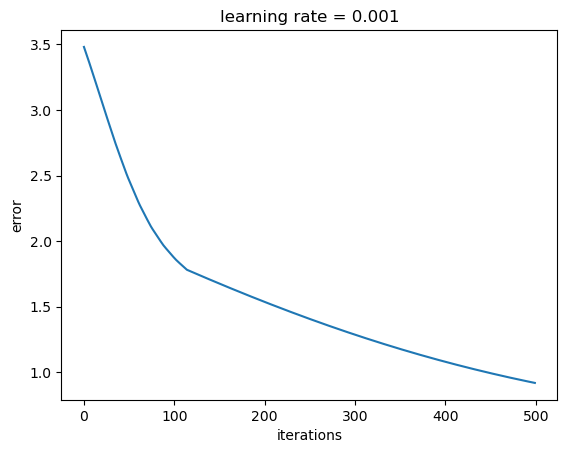

In [15]:
import matplotlib.pyplot as plt

plt.title(f'learning rate = {model.lr}')
plt.xlabel("iterations")
plt.ylabel("error")
plt.plot(model.loss)

In [16]:
def Accuracy(x,y):
    count = 0 
    for i in range(x.shape[0]):
        y_pred = model.predict(x[i])
        if y[i] == y_pred:
            count+=1
    
    print('Accuracy = ', count / x.shape[0])

In [17]:
Accuracy(x_val,y_val)

Accuracy =  0.7096774193548387


In [18]:
filename = "submission.csv"
pickle.dump(model, open(filename, 'wb'))

saved_model = pickle.load(open(filename, 'rb'))